# Theme of this notebook - theories of forex trading (1) - Monetary Base Approach
* This is a memo for one of the theiries for forex trading - Monetary Base Approach

# What is Monetary Base Approach?
* Monetary Base Approach is one of the theories to forecast the theoretical prices of a target currency.
* The formula is as follows.<br>
<b>Theoretical price of currency</b> = $\frac{Monetary \ Base \ of \ target \ currency}{Monetary \ Base \ of \ base \ currency } $
* This formula indicates that the theoretical price is determined by the ratio of monetary base between two countries.
* Let's calculate the theoretical price of USD/JPY as an example.

In [20]:
# First, import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm
import yfinance as yf

In [21]:
# Retrive USD-JPY Yahoo Finance data from 2010M1 to 2023M12 on a monthly basis
usdjpy = yf.download('JPY=X', start='2010-01-01', end='2023-12-31', interval='1mo')

[*********************100%%**********************]  1 of 1 completed


In [22]:
# Create DataFrame
usdjpy = pd.DataFrame(usdjpy.loc['2010-01-01':'2023-12-31', 'Adj Close'])
usdjpy

,Adj Close
Date,
2010-01-01,90.230003
2010-02-01,88.889999
2010-03-01,93.519997
2010-04-01,93.830002
2010-05-01,91.190002
...,...
2023-08-01,146.098999
2023-09-01,149.369995
2023-10-01,149.110992


* Then, let's calculate theoretical prices based on monetary base.
* Data sources of monetary base created by Bank of Japan and Federal Reserve Board are as follows.<br>
[Bank of Japan]<br>
https://www.boj.or.jp/en/statistics/boj/other/mb/index.htm<br>
[Federal Reseve Board]<br>
https://www.federalreserve.gov/datadownload/Choose.aspx?rel=H6

* Note: I used monetary base data (not seasonally adjusted) from each source.

In [23]:
# In this case, used pre-processed data
mb = pd.read_csv("fin-007_monetary_base.csv")

In [24]:
# Calculate monetary base theoretical prices
mb['MB_approach_rate'] = mb.iloc[:,1] / mb.iloc[:,2]
mb = mb[mb['Date'] >= '2010-01']
mb

,Date,MB(not seasonally adjusted) - BOJ\n(Unit: 100 million yen),MB(not seasonally adjusted) - FRB\n(Unit: 100 million US dollors),MB_approach_rate
120,2010-01,980675,19950,49.156642
121,2010-02,956928,21152,45.240545
122,2010-03,964571,20796,46.382525
123,2010-04,983836,20144,48.840151
124,2010-05,984323,20123,48.915321
...,...,...,...,...
283,2023-08,6674477,55591,120.063985
284,2023-09,6698608,55673,120.320586
285,2023-10,6706127,56013,119.724475
286,2023-11,6715329,57315,117.165297


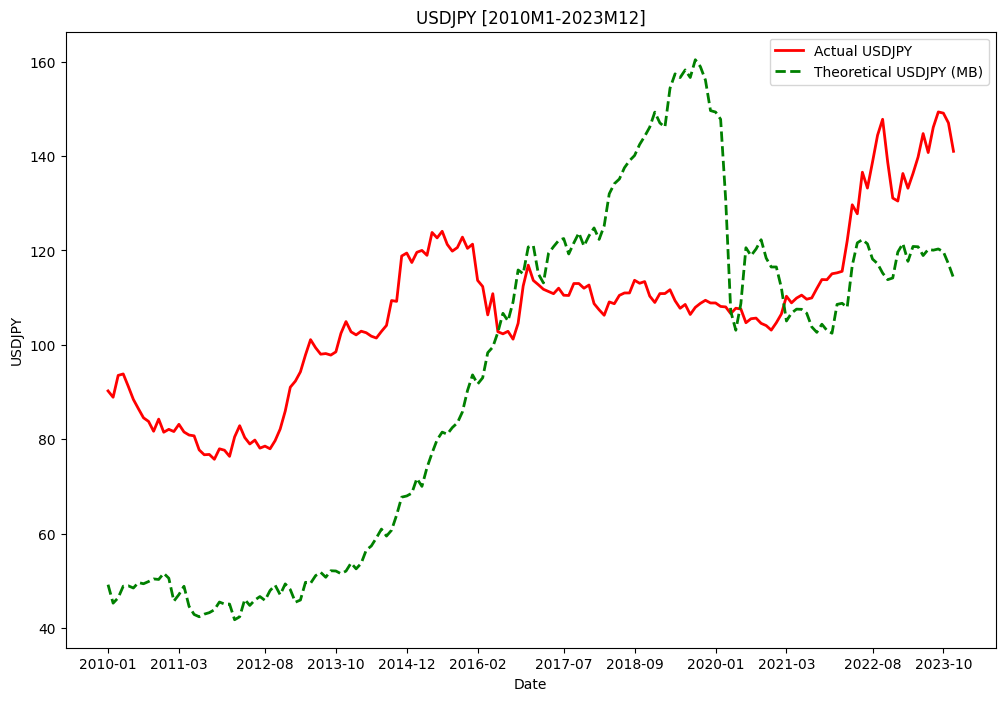

In [25]:
# Vidualize actual prices and theoretical prices by using matplotlib
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

x = mb['Date']
actual_price = usdjpy['Adj Close'].values
theoretical_price = mb['MB_approach_rate'].values

ax.plot(x, actual_price, label='Actual USDJPY', color='r', linewidth=2, linestyle='solid')
ax.plot(x, theoretical_price, label='Theoretical USDJPY (MB)', color='g', linewidth=2, linestyle='dashed')
ax.set_xlabel('Date',loc='center')
ax.set_ylabel('USDJPY')
ax.set_title('USDJPY [2010M1-2023M12]')

locator = mdates.AutoDateLocator(minticks=10, maxticks=15)
ax.xaxis.set_major_locator(locator)

plt.legend(loc = 'best')
plt.show()

# Check R-squared values

In [26]:
# Set intercept to forecast beta by using statsmodel
theoretical_price = sm.add_constant(theoretical_price)

# Build a simple linear regression model
model = sm.OLS(actual_price,theoretical_price)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     108.9
Date:                Tue, 30 Jan 2024   Prob (F-statistic):           6.41e-20
Time:                        03:28:22   Log-Likelihood:                -676.43
No. Observations:                 168   AIC:                             1357.
Df Residuals:                     166   BIC:                             1363.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         79.2836      2.884     27.493      0.000      73.590      84.977
x1             0.3004      0.029     10.435      0.000       0.244       0.357
==============================================================================
Omnibus:                       14.805   Durbin-Watson:                   0.051
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.243
Skew:                           0.733   Prob(JB):                     0.000297
Kurtosis:                       2.585   Cond. No.                         274.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# The meaning of the model
* The model is as follows:<br>
$E(S_{¥})$ = 79.2836 + 0.3004*$S_{$}$
<br>
Where, $S_{¥}$ = the price of yen, $S_{$}$ = the price of dollar<br>
* The R-squared value of the model is about 40%, meaning this model can explain about 40% of the change of price of yen.
* However, about 60% of the change comes from other factors, so we cannot too much rely on this model.

# Conclusion
* Python enables us to beautifully describe the relationship between forex prices and monetary base of specific countries.
* But in this case, the forcasting model has only about 40% of R-squared value, so we cannot too much rely on the manetary base model.